# Week 7 Assignment

This week we are collecting some data from Reddit and doing some basic EDA on it. You should:

- create your Reddit account and API keys
- collect data from a subreddit of your choice
    - at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
- save the data to a SQLite3 database
- perform some basic EDA on the data
    - create at least 2 plots
- write a short analysis at the end describing the process and results
- turn in the Jupyter Notebook and PDF printout or export to the week 7 dropbox

***Optional* advanced section**
- Practice SQL queries and select a subsection of the posts you collected
- Modify your code to collect data beyond the 1000 item limit
- Collect comments from the posts for analysis next week and do some EDA on the comments (e.g. who is the top commenter, which commenters have the most up and down votes or most controversial posts, etc)
- examine n-grams ([bigrams](https://stackoverflow.com/a/37651184/4549682), trigrams) or [collocations](https://www.geeksforgeeks.org/nlp-word-collocations/)

Note: There is no solution file for this week.

# Subreddit - datascience
I have taken up datascience (going by the subject) subreddit for analysis today.

In [1]:
import praw
import pandas as pd

import credentials

In [2]:
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

In [3]:
# Taking 10 posts
ds_subreddit = reddit.subreddit('datascience').hot(limit=10)

In [4]:
reddit.subreddit('ds_subreddit')

Subreddit(display_name='ds_subreddit')

In [5]:
# Traversing the 10 posts taken
for post in ds_subreddit:
    print(post.title, post.score)

Weekly Entering & Transitioning - Thread 02 Oct, 2023 - 09 Oct, 2023 7
The most sought-after Data Science skills 193
Is there any benefit for a Data Analyst to learn C#? 20
What title do these roles and responsibilities fit into? 5
Is it possible to have a non-Gaussian mixture and can it be easily decomposed? 2
[QUESTIONS] Data Scientist Role Organization Questions 1
What is a foundational model? 6
Data Science not in demand. 154
I got an internship as a business analyst is it that bad? 0
Plotting pre-calculated embeddings onto tensorboard projector 1


In [6]:
post.score

1

In [7]:
post.title

'Plotting pre-calculated embeddings onto tensorboard projector'

In [8]:
post.permalink

'/r/datascience/comments/171mmpq/plotting_precalculated_embeddings_onto/'

In [69]:
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': []}


ds_subreddit = reddit.subreddit('datascience').hot(limit=None)

for post in list(ds_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [70]:
ds_df = pd.DataFrame(reddit_data)

In [71]:
ds_df

,title,link,author,n_comments,score,text
0,Weekly Entering & Transitioning - Thread 02 Oc...,/r/datascience/comments/16xmlky/weekly_enterin...,AutoModerator,117,9,\n\nWelcome to this week's entering & transit...
1,"Should we use non-linear models for ""linear"" d...",/r/datascience/comments/172gy7a/should_we_use_...,dopplegangery,77,132,So I had an argument with an interviewer who a...
2,How do data scientist managers manage data sci...,/r/datascience/comments/172zdgx/how_do_data_sc...,cazzobomba,1,3,As a data science manager how do you manage yo...
3,master degree vs bootcamp in datascience,/r/datascience/comments/173076d/master_degree_...,Fiajji_print,0,1,Which is better a mster degree or a bootcamp i...
4,Does your team use Agile and did you have trou...,/r/datascience/comments/172zrsu/does_your_team...,Champaign__Supernova,6,1,"I'm working with a team that uses Agile, and w..."
...,...,...,...,...,...,...
926,Data = Oil,/r/datascience/comments/ycgmbu/data_oil/,realbigflavor,79,1314,
927,Are there unions for data scientists?,/r/datascience/comments/tg2ki6/are_there_union...,DeepTrap,12,5,"I’m only a few years into my career, but I’ve ..."
928,Data Science and Data Analytics is becoming ul...,/r/datascience/comments/nue01q/data_science_an...,,189,1071,"I honestly, don't think people wanting to brea..."
929,Is anyone here into marketing analytics? How d...,/r/datascience/comments/gp0ctd/is_anyone_here_...,Kpopaddiction,48,138,Edit: Thanks to the person who gave this gold ...


# Checking comments for one of the post

Picked up one post for datascience subreddit.

In [26]:
url = "https://www.reddit.com/r/datascience/comments/17089oc/for_those_who_are_in_a_data_science_related/"

In [27]:
datascience = reddit.submission(url=url)

In [28]:
for top_level_comment in datascience.comments:
    print(top_level_comment.body)

I removed your submission. Please post your question in the weekly entering & transitioning thread.

Thanks.
You can't learn everything at school. But you should learn a lot. My school was excellent for technical skills and theory. For me it was a good mix and I'm very pleased. I have BSCS and MS in data science. Every school is different and what one thinks is important others may not. My school had an application focus, I think that's the point of data science/analytics. If you want a more general degree, I would go for computer science.
Answer is no, don’t even need to read the post. 

It’s true for every field from Data Scientist to the President of the United States to a Janitor.
Bachelor of Information Science here. I feel like the degree wasn't much more than an introduction to the most utilized tools. Anything serious I have had to learn on my own.
Had a bachelors in business analytics (first days of this program)

Then went back and got my masters in data science 7 years later

# Saving data to sqlite

In [13]:
import sqlite3

In [72]:
# Moving the data to sqlite file

con = sqlite3.connect("ds_reddit.sqlite")
ds_df.to_sql('posts', con, if_exists='replace', index=False)

931

# Checking the data saved in sqlite file

In [73]:
ds_df_check = pd.read_sql_query('SELECT * FROM posts;', con)
# it's best to close the connection when finished
con.close()
ds_df_check

,title,link,author,n_comments,score,text
0,Weekly Entering & Transitioning - Thread 02 Oc...,/r/datascience/comments/16xmlky/weekly_enterin...,AutoModerator,117,9,\n\nWelcome to this week's entering & transit...
1,"Should we use non-linear models for ""linear"" d...",/r/datascience/comments/172gy7a/should_we_use_...,dopplegangery,77,132,So I had an argument with an interviewer who a...
2,How do data scientist managers manage data sci...,/r/datascience/comments/172zdgx/how_do_data_sc...,cazzobomba,1,3,As a data science manager how do you manage yo...
3,master degree vs bootcamp in datascience,/r/datascience/comments/173076d/master_degree_...,Fiajji_print,0,1,Which is better a mster degree or a bootcamp i...
4,Does your team use Agile and did you have trou...,/r/datascience/comments/172zrsu/does_your_team...,Champaign__Supernova,6,1,"I'm working with a team that uses Agile, and w..."
...,...,...,...,...,...,...
926,Data = Oil,/r/datascience/comments/ycgmbu/data_oil/,realbigflavor,79,1314,
927,Are there unions for data scientists?,/r/datascience/comments/tg2ki6/are_there_union...,DeepTrap,12,5,"I’m only a few years into my career, but I’ve ..."
928,Data Science and Data Analytics is becoming ul...,/r/datascience/comments/nue01q/data_science_an...,,189,1071,"I honestly, don't think people wanting to brea..."
929,Is anyone here into marketing analytics? How d...,/r/datascience/comments/gp0ctd/is_anyone_here_...,Kpopaddiction,48,138,Edit: Thanks to the person who gave this gold ...


# EDA on datascience data

<Axes: ylabel='Frequency'>

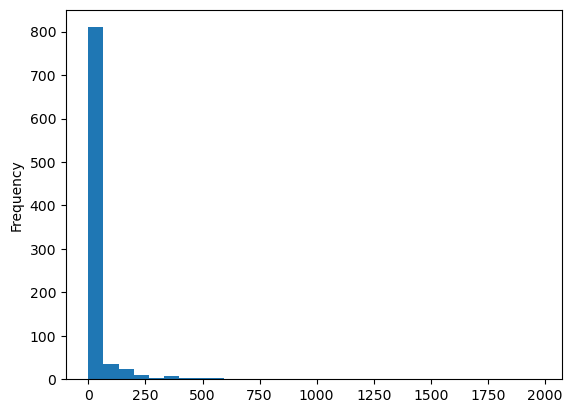

In [38]:
ds_df['score'].plot.hist(bins=30)

In [44]:
ds_df[ds_df['score'] > 600]

,title,link,author,n_comments,score,text
108,It's not just you. Everyone hates the return t...,/r/datascience/comments/16vaaco/its_not_just_y...,databro92,254,618,"Somehow, I am lucky enough to land a completel..."
154,LLMs hype has killed data science,/r/datascience/comments/16t9p4v/llms_hype_has_...,BiteFancy9628,302,836,That's it.\n\nAt my work in a huge company alm...
747,It be like this now,/r/datascience/comments/16fm64z/it_be_like_thi...,OverratedDataScience,52,1131,
886,"I posted for a Data Analyst, this is what you ...",/r/datascience/comments/13k8665/i_posted_for_a...,greenearrow,288,858,"Our org needs a new data analyst, so I wrote u..."
891,Advice for data scientists,/r/datascience/comments/133n4a1/advice_for_dat...,RuffleCopter,322,1040,"Throughout my career, I have always occupied r..."
893,Pretty Accurate Chart to Clear Up Job Title Am...,/r/datascience/comments/12zwc24/pretty_accurat...,gpbuilder,199,1976,
901,Data = Oil,/r/datascience/comments/ycgmbu/data_oil/,realbigflavor,79,1306,
903,Data Science and Data Analytics is becoming ul...,/r/datascience/comments/nue01q/data_science_an...,,189,1068,"I honestly, don't think people wanting to brea..."


In [45]:
ds_df[ds_df['score'] > 600]['link'].to_list()

['/r/datascience/comments/16vaaco/its_not_just_you_everyone_hates_the_return_to/',
 '/r/datascience/comments/16t9p4v/llms_hype_has_killed_data_science/',
 '/r/datascience/comments/16fm64z/it_be_like_this_now/',
 '/r/datascience/comments/13k8665/i_posted_for_a_data_analyst_this_is_what_you_are/',
 '/r/datascience/comments/133n4a1/advice_for_data_scientists/',
 '/r/datascience/comments/12zwc24/pretty_accurate_chart_to_clear_up_job_title/',
 '/r/datascience/comments/ycgmbu/data_oil/',
 '/r/datascience/comments/nue01q/data_science_and_data_analytics_is_becoming_ultra/']

<Axes: >

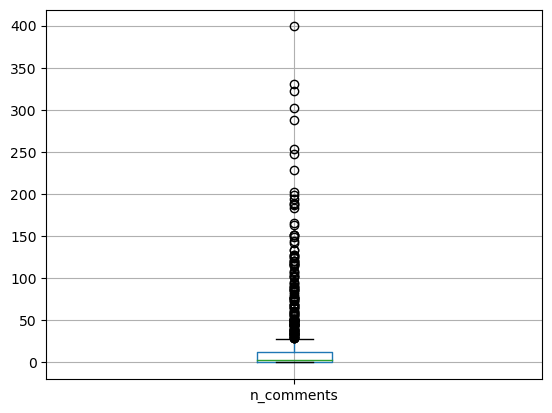

In [46]:
# Plotting a boxplot but we see some outliers
ds_df.boxplot('n_comments')

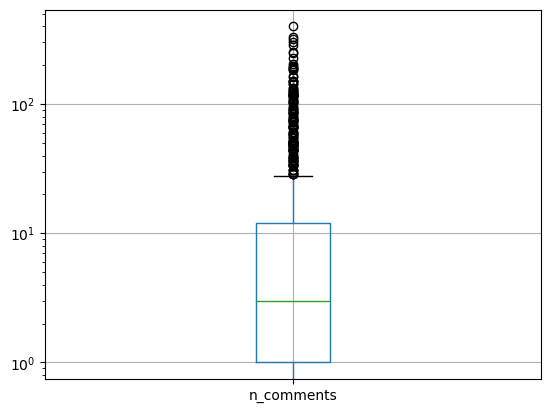

In [47]:
import matplotlib.pyplot as plt
ds_df.boxplot('n_comments')
plt.yscale('log')

Still some outliers can be observed.

# Scatter plot

<Axes: xlabel='score', ylabel='n_comments'>

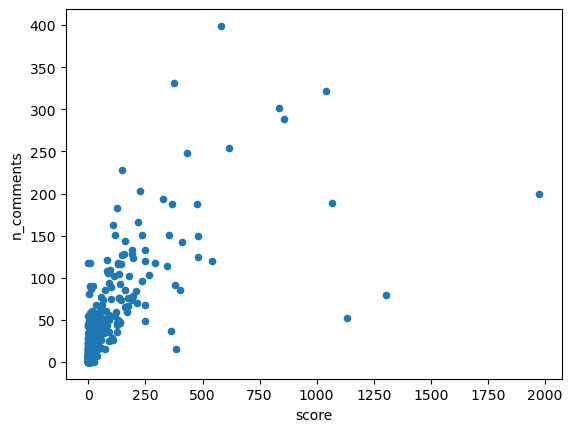

In [48]:
ds_df.plot.scatter(x='score', y='n_comments')

# Bar Plot

<Axes: xlabel='author'>

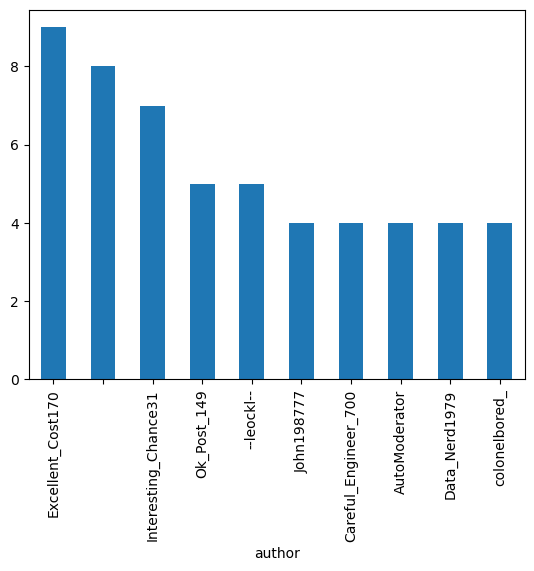

In [50]:
ds_df['author'].value_counts()[:10].plot.bar()

# Selecting posts where author is greenearrow

In [51]:
ds_df[ds_df['author'] == 'greenearrow']

,title,link,author,n_comments,score,text
886,"I posted for a Data Analyst, this is what you ...",/r/datascience/comments/13k8665/i_posted_for_a...,greenearrow,288,858,"Our org needs a new data analyst, so I wrote u..."


# Analysis

Created the API keys and user id for reddit website and added to the credentials.py.
I have taken datascience subreddit for analaysis today. Started by extracting the first 10 posts for this subreddit and saved it in "ds_subreddit". used for loop to traverse the posts in ds_subreddit.Checked on the score, title and permalink for the posts.
Further extracted the complete seubreddit posts using for loop and saved it in pandas data frame "ds_df". It has total 931 posts.tried to check comments for one of the post using the url and extracted the top level comment.
Post this saved the data to sqlite file in the local "ds_reddit.sqlite" and checked by again creating a dataframe from this data. Observation is all 931 posts are extracted fine.
Did some EDA on this data science subreddit, plotted a histogram afor score frequency and checked the records where score is greater than 600 and got the permalinks in a list. Plotted the boxplot and observed few outliers. Also plotted the scatter plot with numeric data that is score and comments . Plotted a bar plot with author and score and got the top author (one with highest score). Tried the query by selecing the records for one particular author.

# Optional section

# Selecting few columns of the data

In [14]:
con = sqlite3.connect('ds_reddit.sqlite')
test_df = pd.read_sql_query('SELECT title, n_comments FROM posts;', con)
con.close()
test_df

,title,n_comments
0,Weekly Entering & Transitioning - Thread 02 Oc...,87
1,The most sought-after Data Science skills,50
2,Data Analyst to Data Science (already have Mas...,0
3,What is a foundational model?,11
4,Data Science not in demand.,228
...,...,...
901,Data = Oil,79
902,Are there unions for data scientists?,12
903,Data Science and Data Analytics is becoming ul...,189
904,Is anyone here into marketing analytics? How d...,48


# Collecting more than 1000 posts.

This data also have 906 posts but checking on the recent posts

In [15]:
newest_posts = list(reddit.subreddit('datascience').new(limit=10))

In [55]:
len(newest_posts)

10

In [57]:
newest_posts[0]

Submission(id='171ii99')

In [59]:
newest_posts[0].created_utc

1696613604.0

In [60]:
newest_posts[-1].created_utc

1696531670.0

# Collecting comments

In [32]:
reddit_posts_data = {'title': [],
                    'link': [],
                    'author': [],
                    'n_comments': [],
                    'score': [],
                    'text': [],
                    'id': []}

reddit_comments_data = {'author': [],
                        'score': [],
                        'text': [],
                        'post_id': []}

ds_subreddit = reddit.subreddit('datascience').new(limit=None)

for post in list(ds_subreddit):
    reddit_posts_data['title'].append(post.title)
    reddit_posts_data['link'].append(post.permalink)
    if post.author is None:
        reddit_posts_data['author'].append(None)
    else:
        reddit_posts_data['author'].append(post.author.name)
    reddit_posts_data['n_comments'].append(post.num_comments)
    reddit_posts_data['score'].append(post.score)
    reddit_posts_data['text'].append(post.selftext)
    reddit_posts_data['id'].append(post.id)

    post.comments.replace_more(limit=None)
    for comment in post.comments:
        if comment.author is None:
            reddit_comments_data['author'].append('')
        else:
            reddit_comments_data['author'].append(comment.author.name)
        reddit_comments_data['score'].append(comment.score)
        reddit_comments_data['text'].append(comment.body)
        reddit_comments_data['post_id'].append(post.id)

In [33]:
post_df = pd.DataFrame(reddit_posts_data)
comment_df = pd.DataFrame(reddit_comments_data)

In [34]:
con = sqlite3.connect('ds_reddit.sqlite')
post_df.to_sql('posts_ds', con, if_exists='replace')
comment_df.to_sql('comments_ds', con, if_exists='replace')
con.close()

In [35]:
comment_df

,author,score,text,post_id
0,playsmartz,1,Depends on the kind of data?\n\nCountry names ...,172ko0y
1,MagicMark2,1,You could explore using an Aggregation if you ...,172ii3z
2,nerdyjorj,81,"I'm on team ""the best model is the simplest on...",172gy7a
3,aspera1631,48,"I would take your side in this argument, but I...",172gy7a
4,AntiqueFigure6,31,‘Only explainability’? Explainability is far f...,172gy7a
...,...,...,...,...
5323,milkteaoppa,1,Change your Masters Research into Experience a...,16dwt7v
5324,Davidat0r,1,How is this a dichotomy?,16dwt7v
5325,Dangerous_Hearing_34,2,Atta-boy!,16dwi3w
5326,billsgates12,2,Thanks for sharing! :),16dwi3w


# Bar plot for comments df

<Axes: xlabel='author'>

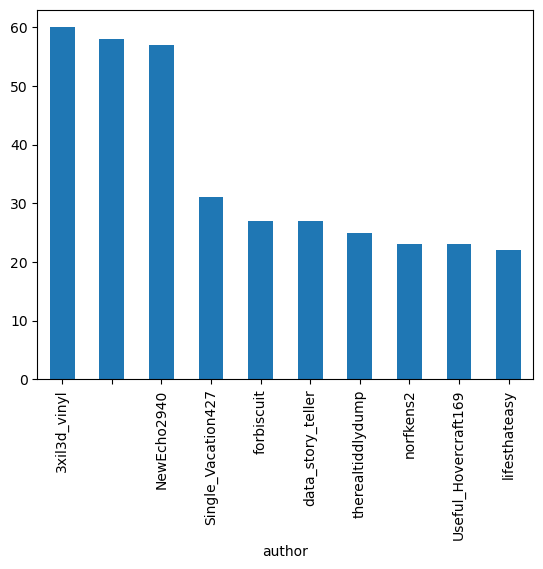

In [22]:
comment_df['author'].value_counts()[:10].plot.bar()

# Histogram plot for scre frequency

<Axes: ylabel='Frequency'>

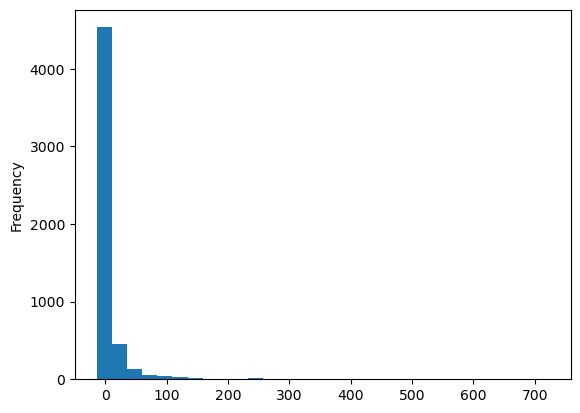

In [74]:
comment_df['score'].plot.hist(bins=30)

In [29]:
# Top commenter
comment_df[comment_df['author'] == '3xil3d_vinyl']

,author,score,text,post_id
742,3xil3d_vinyl,6,I have a BS in Statistics and Economics.\n\nI ...,16x200r
1347,3xil3d_vinyl,3,Most people start out in Business Analytics be...,16ucjce
1833,3xil3d_vinyl,20,"Yes, but get the degree from a top ranked scho...",16s2ex1
1931,3xil3d_vinyl,3,Your business should have a definition of marg...,16rt4o4
1953,3xil3d_vinyl,1,Can you upload those CSVs into a cloud warehou...,16rqnla
1986,3xil3d_vinyl,5,I have done recruiting at career fairs before....,16rjh59
2201,3xil3d_vinyl,17,1. Practice behavioral questions using the STA...,16qd0ij
2210,3xil3d_vinyl,10,There needs to be more moderators for this sub...,16qc882
2231,3xil3d_vinyl,18,Just take the job and live with roommates. Liv...,16qaxeq
2283,3xil3d_vinyl,5,I was told to learn a new tool and I asked que...,16qap3h


3xil3d_vinyl is the top commenter and can also see the score as 60 so looks some controversial discussion is in progress.

# n-gram count - NLTK package

In [39]:
!conda install -c conda-forge nltk -y

Retrieving notices: ...working... DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/notices.json HTTP/1.1" 404 None
done
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Startin

In [40]:
import nltk

fd = nltk.FreqDist(' '.join(ds_df['title']).split())

fd.most_common(20)

[('to', 227),
 ('a', 202),
 ('in', 178),
 ('Data', 168),
 ('for', 163),
 ('data', 155),
 ('the', 128),
 ('of', 107),
 ('and', 105),
 ('you', 99),
 ('I', 93),
 ('is', 84),
 ('What', 82),
 ('How', 81),
 ('science', 76),
 ('with', 76),
 ('do', 70),
 ('Science', 62),
 ('on', 62),
 ('or', 47)]

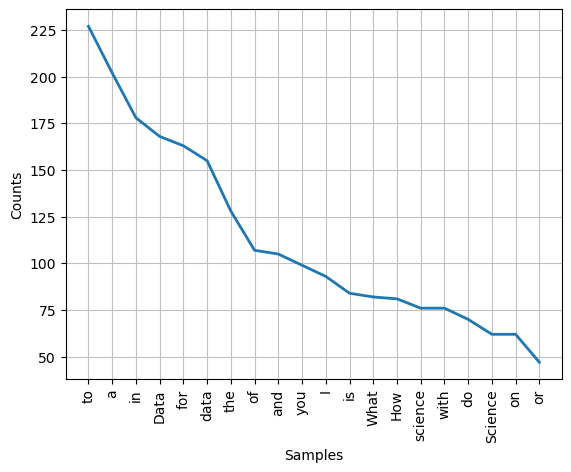

<Axes: xlabel='Samples', ylabel='Counts'>

In [41]:
fd.plot(20)

In [43]:
#from nltk.corpus import stopwords

stops = stopwords.words('english')
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# converting to lower case

In [45]:
words = ' '.join(ds_df['title']).lower().split()

In [46]:
cleaned_words = [w for w in words if w not in set(stops)]

# Plotting without stop words

In [47]:
cleaned_words = [w for w in words if w not in set(stops)]

In [48]:
cleaned_fd = nltk.FreqDist(cleaned_words)
cleaned_fd.most_common(20)

[('data', 323),
 ('science', 138),
 ('job', 46),
 ('-', 39),
 ('learning', 29),
 ('use', 29),
 ('model', 29),
 ('time', 29),
 ('ds', 27),
 ('need', 24),
 ('help', 24),
 ('python', 24),
 ('scientist', 22),
 ('ml', 22),
 ('anyone', 20),
 ('?', 19),
 ('work', 19),
 ('questions', 18),
 ('best', 18),
 ('get', 18)]

# Adding few common words and punctuations to stop words 
This plot should make more sense as the result hav emore technical terms.

In [59]:
stops = set(stops) | set(['use', 'anyone','help','get','advice','best','using','need','looking','?','-','_'])

In [60]:
cleaned_words = [w for w in words if w not in set(stops)]

In [61]:
cleaned_fd = nltk.FreqDist(cleaned_words)
cleaned_fd.most_common(20)

[('data', 323),
 ('science', 138),
 ('job', 46),
 ('learning', 29),
 ('model', 29),
 ('time', 29),
 ('ds', 27),
 ('python', 24),
 ('scientist', 22),
 ('ml', 22),
 ('work', 19),
 ('questions', 18),
 ('analyst', 17),
 ('analysis', 17),
 ('series', 17),
 ('career', 17),
 ('project', 16),
 ('ai', 16),
 ('good', 15),
 ('analytics', 15)]

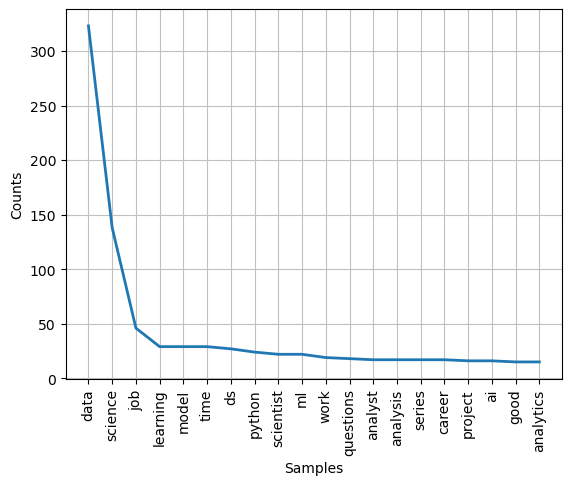

<Axes: xlabel='Samples', ylabel='Counts'>

In [62]:
cleaned_fd.plot(20)

# Analysis

In this section we explored the queries and selected few columns like title and comments from the sqlite file.Also checked the way to extract more than 1000 posts at a time but the subreddit has only 906 posts so results did not vary but we got some recent posts.
Further collected the comments for each post in comment_df and did some EDA on commensts data. Observation is 3xil3d_vinyl is the top commenter and can also see the score as 60 for few commensts so looks like some controversial discussion is in progress. Plotted a bar plot with author and score and a histogram for score frequency.Didn't try scatter plot as we had only one numeric data in comments dataframe.
Also explored the n grams by installing NLTK package. Splitted the titles and removed all the whitespaces to get the most used words. Tried to clean the data by removing the stop words. first downloaded the default stop words and removed those and then added few common words as per data and some punctuations as well. Again created a plot using these most common words but now more technical terms are added to the graph.